<a href="https://colab.research.google.com/github/aku134/GRIP_Internship/blob/main/GRIP_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction Using Decision Trees

In [71]:
#import all the packages
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import pandas as pd

iris=datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.head(5))

y=iris.target
print(y)

#Split the data into test and training
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(df, y, test_size = 0.3)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_training_data,y_training_data)
print("Training Completed")


Training Completed


In [73]:
#Make predictions on the test_data
predictions=dtree.predict(x_test_data)
new=pd.DataFrame(x_test_data)
ar=[]
for i in range(len(predictions)):
  if predictions[i]==0:
    ar.append('iris-setosa')
  elif predictions[i]==1:
   ar.append('iris-versicolor')
  else:
   ar.append('iris-virginica')
new.insert(4, "Classification",ar, True)
print("Prediction on Test data")
print(new)

Prediction on Test data
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)   Classification
139                6.9               3.1  ...               2.1   iris-virginica
60                 5.0               2.0  ...               1.0  iris-versicolor
68                 6.2               2.2  ...               1.5  iris-versicolor
140                6.7               3.1  ...               2.4   iris-virginica
66                 5.6               3.0  ...               1.5  iris-versicolor
128                6.4               2.8  ...               2.1   iris-virginica
40                 5.0               3.5  ...               0.3      iris-setosa
148                6.2               3.4  ...               2.3   iris-virginica
109                7.2               3.6  ...               2.5   iris-virginica
129                7.2               3.0  ...               1.6  iris-versicolor
51                 6.4               3.2  ...               1.5  iris-versicolor
134 

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test_data,predictions)
report = classification_report(predictions,y_test_data )
cm = confusion_matrix(y_test_data,predictions)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.93      0.90        15
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion matrix:
[[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]


In [3]:
!pip install pydotplus
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


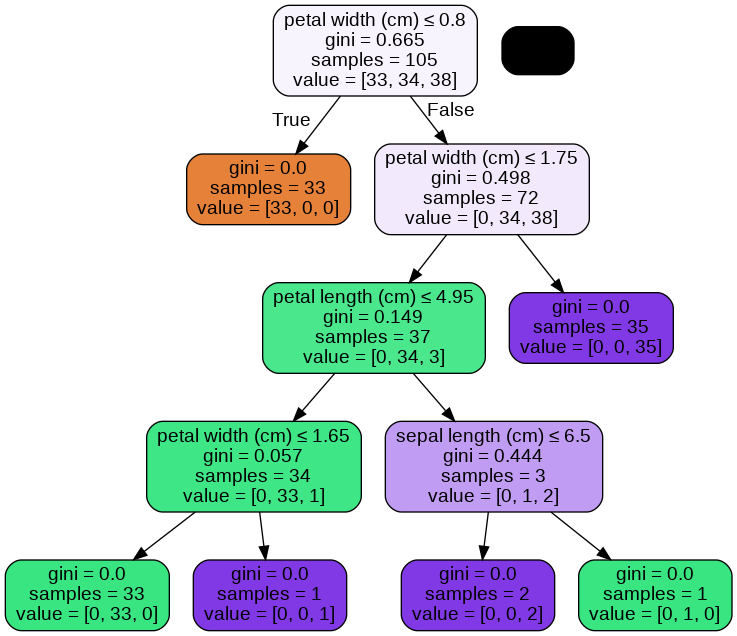

In [74]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=iris.feature_names,filled=True,
                rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
